In [2]:
# importing the necessary libraries
#from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
diabetes_data.describe().T 

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [7]:
dataset=diabetes_data.copy()

In [8]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

In [9]:
features_with_na

[]

In [10]:
dataset.Pregnancies.isnull().sum()

0

In [11]:
min(dataset.Pregnancies)

0

In [12]:
dataset.shape

(768, 9)

In [13]:
pd.pandas.set_option("display.max_rows",None)

In [14]:
dataset.Pregnancies

0       6
1       1
2       8
3       1
4       0
5       5
6       3
7      10
8       2
9       8
10      4
11     10
12     10
13      1
14      5
15      7
16      0
17      7
18      1
19      1
20      3
21      8
22      7
23      9
24     11
25     10
26      7
27      1
28     13
29      5
30      5
31      3
32      3
33      6
34     10
35      4
36     11
37      9
38      2
39      4
40      3
41      7
42      7
43      9
44      7
45      0
46      1
47      2
48      7
49      7
50      1
51      1
52      5
53      8
54      7
55      1
56      7
57      0
58      0
59      0
60      2
61      8
62      5
63      2
64      7
65      5
66      0
67      2
68      1
69      4
70      2
71      5
72     13
73      4
74      1
75      1
76      7
77      5
78      0
79      2
80      3
81      2
82      7
83      0
84      5
85      2
86     13
87      2
88     15
89      1
90      1
91      4
92      7
93      4
94      2
95      6
96      2
97      1
98      6
99      1


In [22]:
len(dataset.loc[dataset['Pregnancies']==0]),len(dataset.loc[dataset['Glucose']==0]),len(dataset.loc[dataset['BloodPressure']==0]),len(dataset.loc[dataset['SkinThickness']==0]),len(dataset.loc[dataset['Insulin']==0]),len(dataset.loc[dataset['BMI']==0])

(111, 5, 35, 227, 374, 11)

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

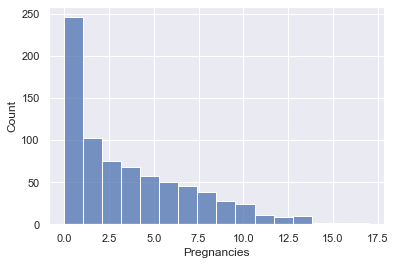

In [29]:

sns.histplot(dataset, x="Pregnancies")

<AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>

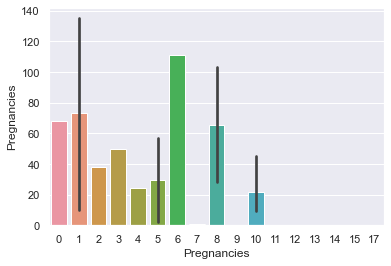

In [30]:
pc=dataset['Pregnancies'].value_counts()
sns.barplot(x="Pregnancies", y=pc, data=dataset)

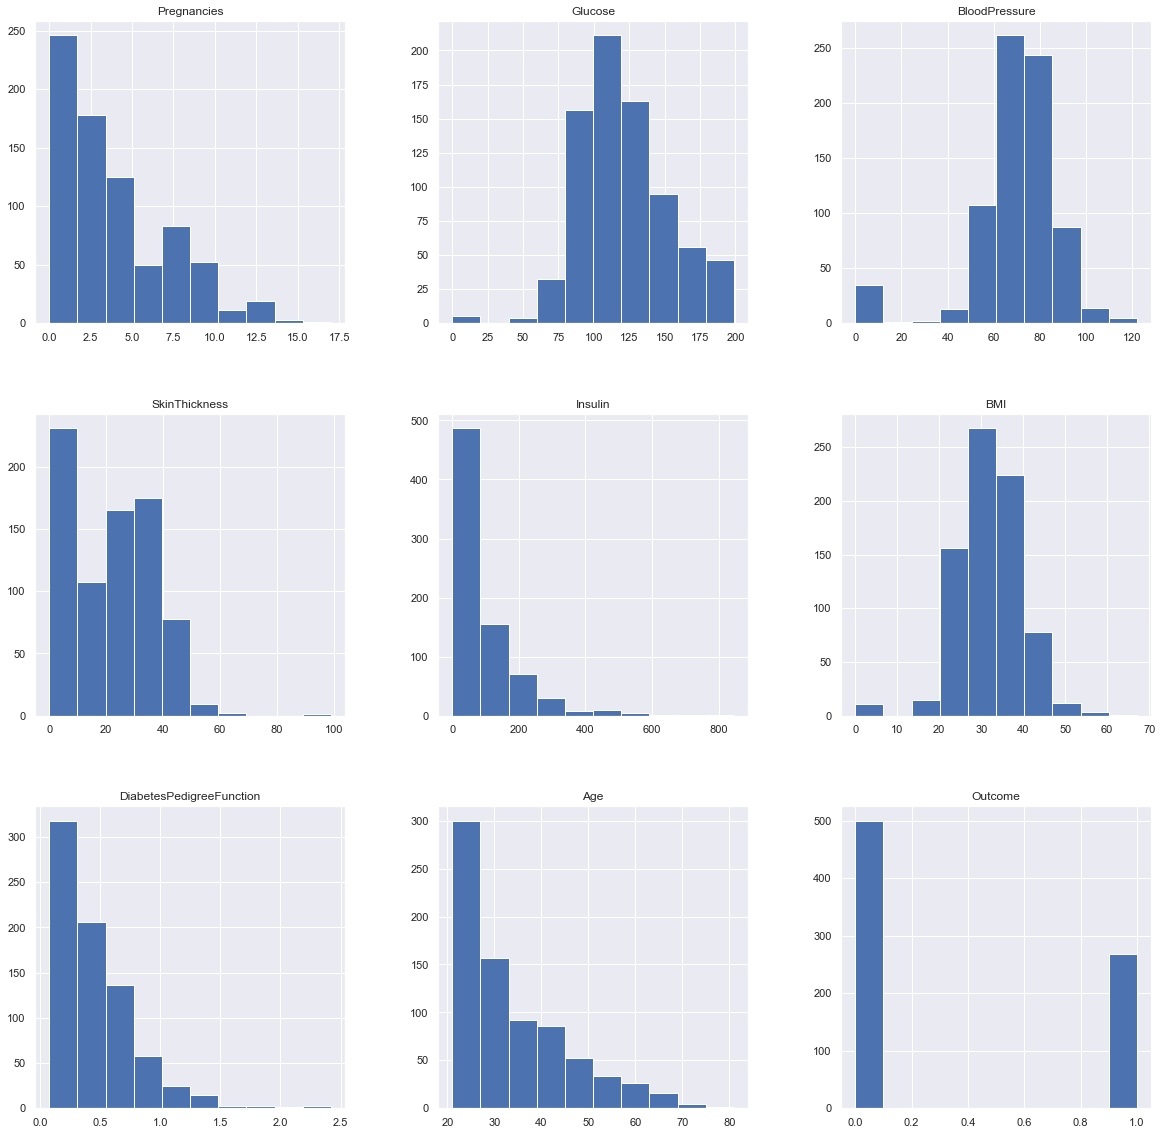

In [31]:
p = dataset.hist(figsize = (20,20))

In [32]:
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [33]:
print(dataset.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [34]:
dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace = True)
dataset.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [35]:
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace = True)
dataset.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [36]:
dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(), inplace = True)
dataset.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [37]:
dataset['Insulin'].fillna(dataset['Insulin'].median(), inplace = True)
dataset.isna().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [38]:
dataset['BMI'].fillna(dataset['BMI'].median(), inplace = True)
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

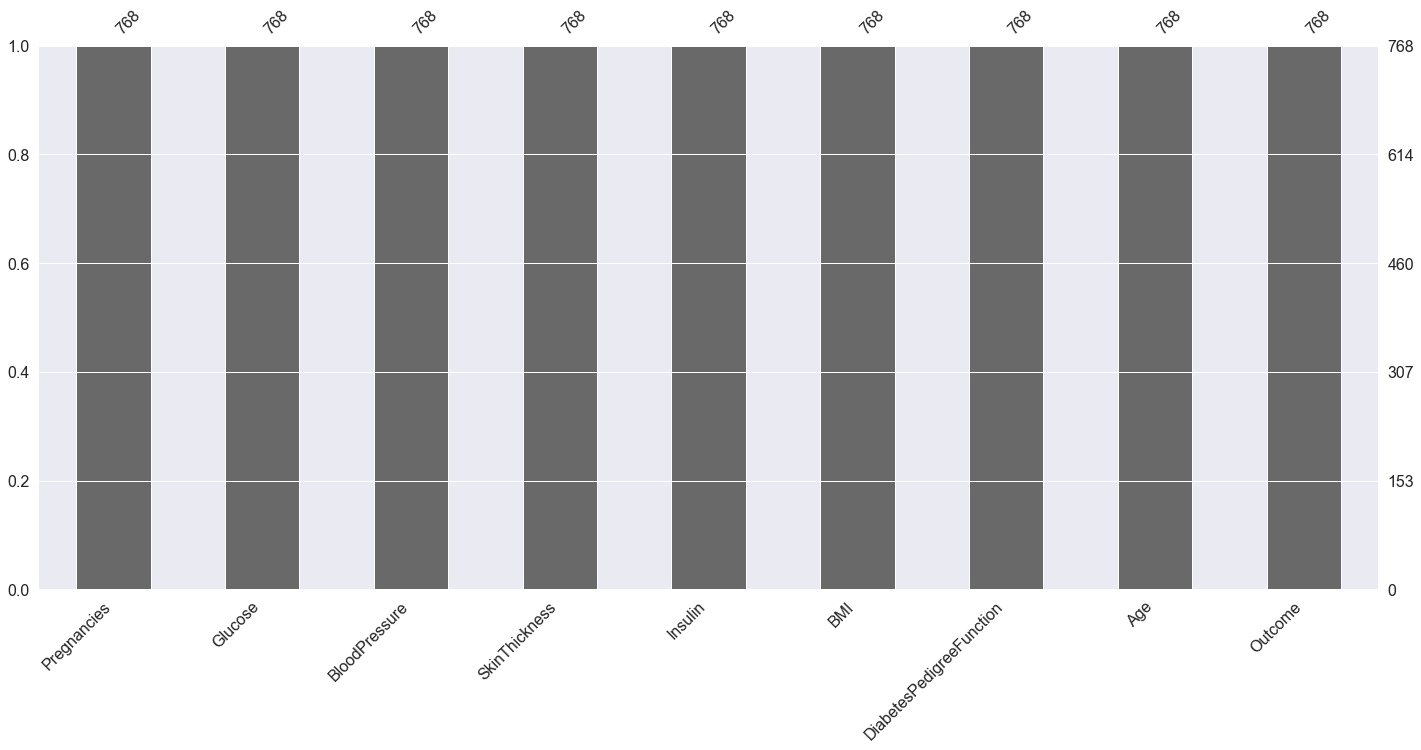

In [39]:
## null count analysis
import missingno as msno
p=msno.bar(dataset)

In [40]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Outcome']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [41]:
scaler.transform(dataset[feature_scale])

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

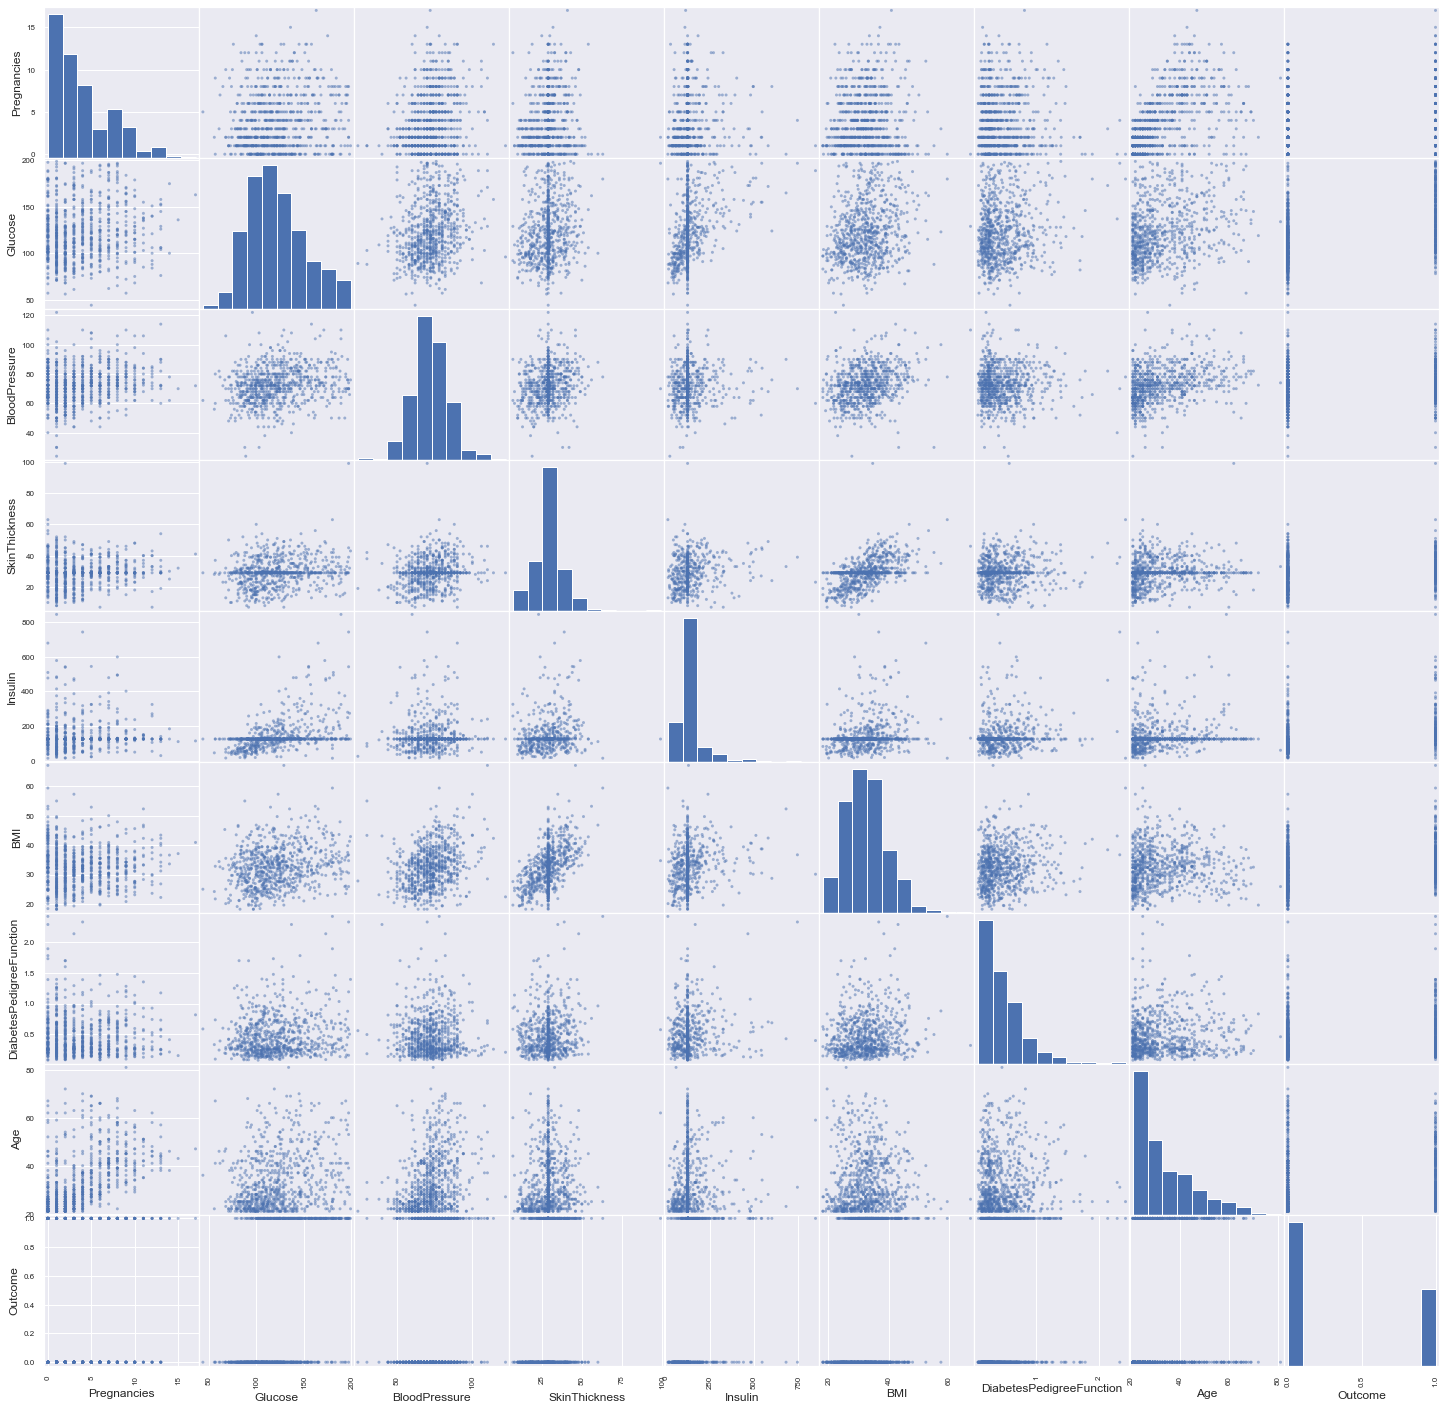

In [42]:
#comparing all  features :
from pandas.plotting import scatter_matrix
p=scatter_matrix(dataset,figsize=(25, 25))

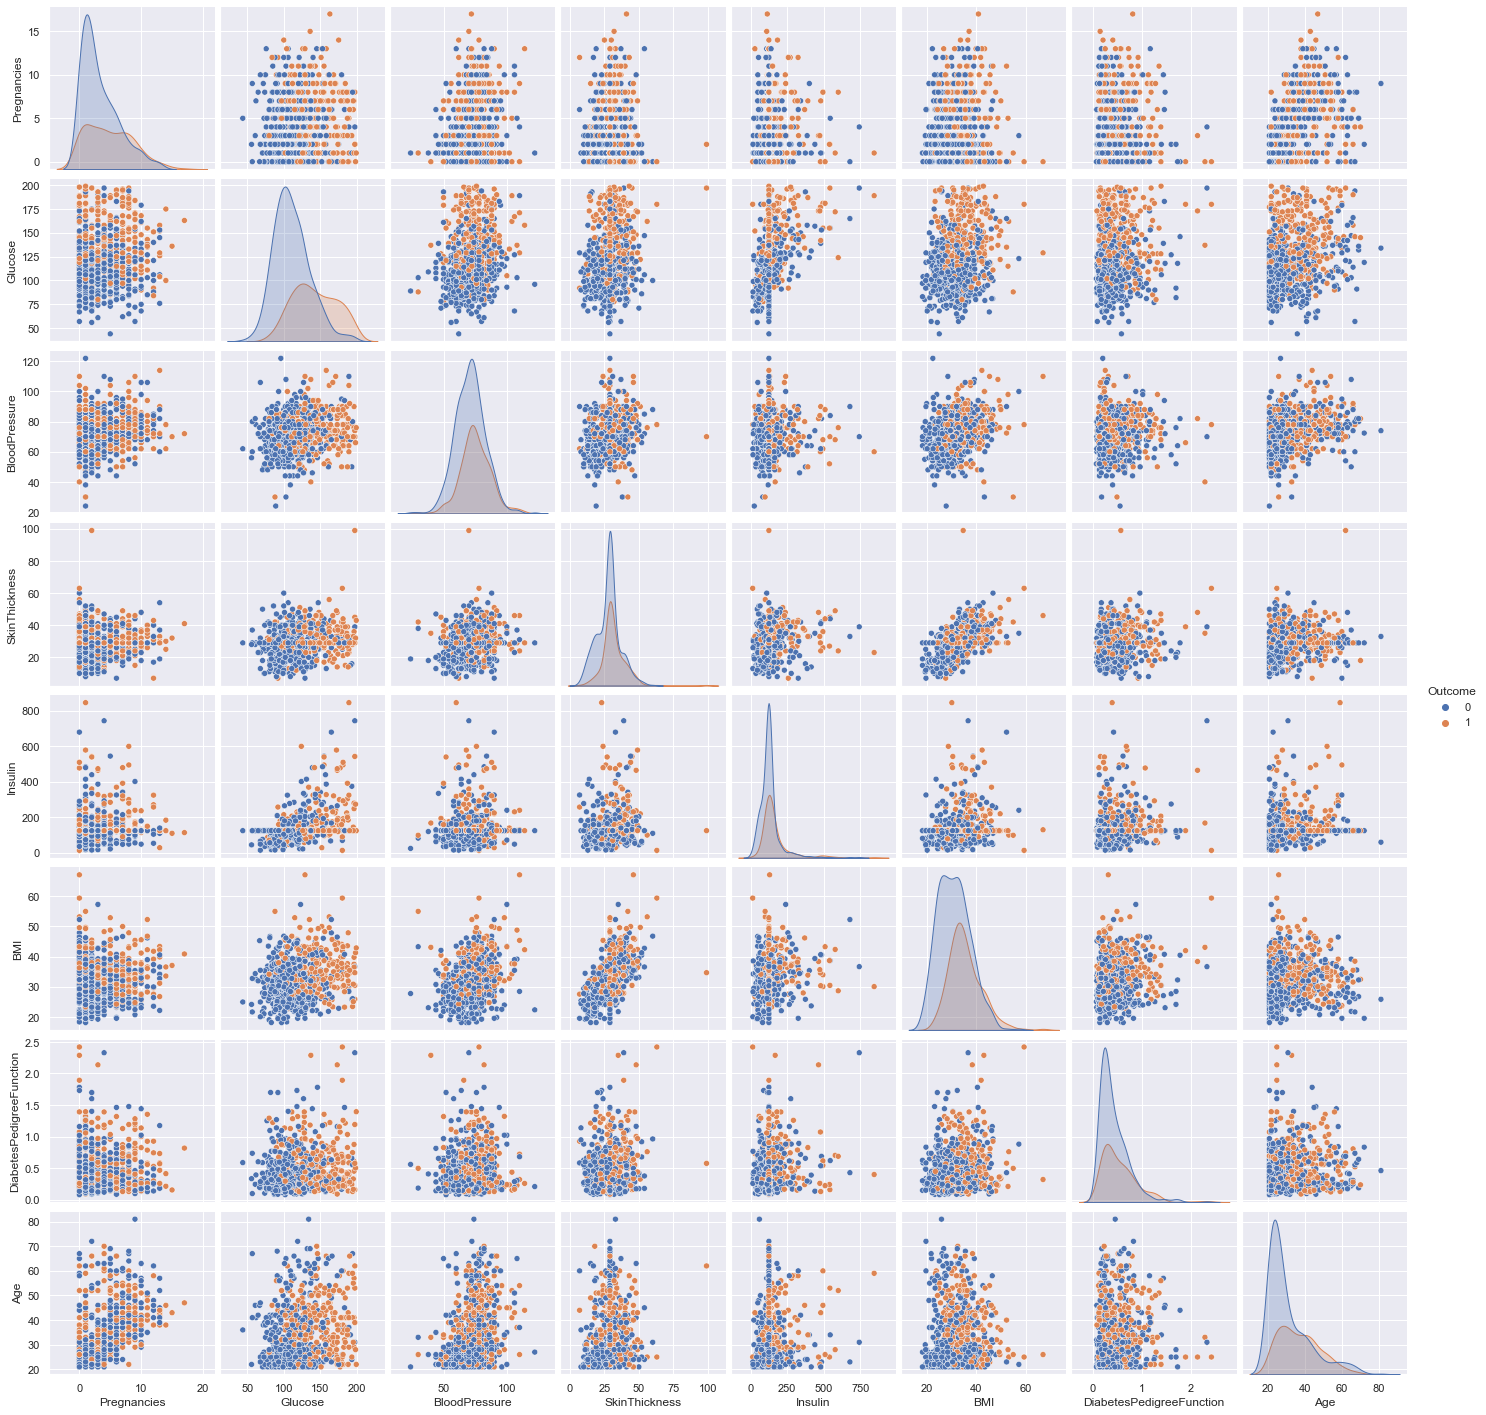

In [43]:
#differentiating with dependent feature:
p=sns.pairplot(dataset, hue = 'Outcome')

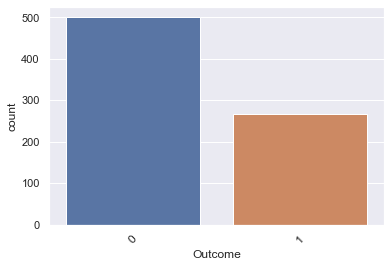

In [44]:
g = sns.countplot('Outcome',data=dataset) # a countplot based on the wage class column
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 12)
plt.show()

In [49]:
import plotly.graph_objs as go
import pandas as pd

# dfd = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
textd = ['non-diabetic' if cl==0 else 'diabetic' for cl in dataset['Outcome']]

fig = go.Figure(data=go.Splom(
                  dimensions=[dict(label='Pregnancies', values=dataset['Pregnancies']),
                              dict(label='Glucose', values=dataset['Glucose']),
                              dict(label='BloodPressure', values=dataset['BloodPressure']),
                              dict(label='SkinThickness', values=dataset['SkinThickness']),
                              dict(label='Insulin', values=dataset['Insulin']),
                              dict(label='BMI', values=dataset['BMI']),
                              dict(label='DiabPedigreeFun', values=dataset['DiabetesPedigreeFunction']),
                              dict(label='Age', values=dataset['Age'])],
                  marker=dict(color=dataset['Outcome'],
                              size=5,
                              colorscale='Bluered',
                              line=dict(width=0.5,
                                        color='rgb(230,230,230)')),
                  text=textd,
                  diagonal=dict(visible=False)))

title = "Scatterplot Matrix (SPLOM) for Diabetes Dataset"
fig.update_layout(title=title,
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')

fig.show()